<h3> This is the analysis script for Ariel's Cat Task. </h3>

<h5> Subject-level analyses </h5>
Drawing distribution curve for each participant's key_RT_mean
<h5> Group-level analyses </h5>
Running one-sample t tests for each condition (primary, similar, other condition) in each comparison (key_RT_mean, side_accuracy, color_accuracy) and drawing bar graphs for each comparison * conditions.

In [28]:
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

# The function SubjectStats takes 1 input argument - the fileName. Its output arguments are key_RT_mean, 
# side_accuracy, and color_accuracy for each file/participant. 
def SubjectStats(fileName):
    # The variable df creates a dataframe from reading the csv file.
    df = pandas.read_csv(fileName, header=None)
    
    # The variable df.columns gives names to the columns in the dataframe.
    df.columns = ['targ_name', 'targ_side', 'keypress', 'key_RT', 'color_response']
    
    # The variable c adds a new column called targ_cond by copying over the information from targ_name.
    c = df.loc[:, 'targ_name']
    df.loc[:, 'targ_cond'] = c

    # This edits the information in the column targ_name so that all black cats are equal to 1.
    df.loc[df.targ_name == 'Cat_1_1.bmp', ['targ_name']] = 1
    df.loc[df.targ_name == 'Cat_1_2.bmp', ['targ_name']] = 1
    df.loc[df.targ_name == 'Cat_1_3.bmp', ['targ_name']] = 1

    # This edits the information in the column targ_name so that all orange cats are equal to -1.
    df.loc[df.targ_name == 'Cat_2_1.bmp', ['targ_name']] = -1
    df.loc[df.targ_name == 'Cat_2_2.bmp', ['targ_name']] = -1
    df.loc[df.targ_name == 'Cat_2_3.bmp', ['targ_name']] = -1

    # This edits the information in the column color_response so that pressing the black rectangle is equal to 1.
    df.loc[df.color_response == 'black', ['color_response']] = 1
    
    # This edits the information in the column color_response so that pressing the orange rectangle is equal to -1.
    df.loc[df.color_response == 'orange', ['color_response']] = -1

    # This edits the information in the column targ_side so that targets appearing on the left are equal to -1.
    df.loc[df.targ_side == 'left', ['targ_side']] = -1

    # This edits the information in the column targ_side so that targets appearing on the right are equal to 1.
    df.loc[df.targ_side == 'right', ['targ_side']] = 1

    # This edits the information in the column keypress so that pressing j is equal to -1.
    df.loc[df.keypress == 'j', ['keypress']] = -1

    # This edits the information in the column keypress so that pressing k is equal to 1.
    df.loc[df.keypress == 'k', ['keypress']] = 1

    # The variable a adds a new column called side_acc (the accuracy of the keypress for targ_side) by multiplying 
    # these columns. Accurate = 1, inaccurate (including random keypress) = -1.
    a = df.loc[:, 'targ_side'] * df.loc[:, 'keypress']
    a[a != 1] = -1
    df.loc[:, 'side_acc'] = a

    # The variable b adds a new column called color_acc (the accuracy of the color_response for targ_name) by multiplying 
    # these columns. Accurate = 1, inaccurate = -1.
    b = df.loc[:, 'targ_name'] * df.loc[:, 'color_response']
    b[b != 1] = -1
    df.loc[:, 'color_acc'] = b

    # This edits the information in the column targ_cond so that the primary target is equal to 1.
    df.loc[df.targ_cond == 'Cat_1_1.bmp', ['targ_cond']] = 1

    # This edits the information in the column targ_cond so that similar targets (black cats) are equal to 2.
    df.loc[df.targ_cond == 'Cat_1_2.bmp', ['targ_cond']] = 2
    df.loc[df.targ_cond == 'Cat_1_3.bmp', ['targ_cond']] = 2

    # This edits the information in the column targ_cond so that other targets (orange cats) are equal to 3.
    df.loc[df.targ_cond == 'Cat_2_1.bmp', ['targ_cond']] = 3
    df.loc[df.targ_cond == 'Cat_2_2.bmp', ['targ_cond']] = 3
    df.loc[df.targ_cond == 'Cat_2_3.bmp', ['targ_cond']] = 3
    
    # The variable c_idx slices the rows for each condition. The variable labels names these conditions in the order of slicing. 
    c_idx = [1, 2, 3]
    labels = ['primary', 'similar', 'other']
    
    # This returns the values for key_RT_mean, side_accuracy, and color_accuracy for each file as a list.
    key_RT_mean = []
    side_accuracy = []   
    color_accuracy = []
    
    # This sets the figure size in inches and the resolution/dpi in pixels per inch.
    plt.figure(figsize = (4, 3), dpi = 300)
    
    # This loop goes through each condition (3) for all of the return values (3).
    for i in range(3):
        # The variable df1 creates a new dataframe to slice the rows by the condition indices.
        df1 = df.loc[df.loc[:, 'targ_cond'] == c_idx[i]]
        
        # This calculates the means for the variables side_acc and color_acc.
        side_accuracy.append(np.mean(df1.loc[:, 'side_acc']))
        color_accuracy.append(np.mean(df1.loc[:, 'color_acc']))
        
        # The variable df1 creates a new dataframe to slice the rows by side_acc.
        # This calculates the RT for the keypress by filtering out incorrect trials (any trial less than 0 because
        # incorrect trials in side_acc = -1).
        df1 = df1.loc[df1.loc[:, 'side_acc'] > 0, :]
        key_RT_mean.append(np.mean(df1.loc[:, 'key_RT']))
        
        # This creates the figure for key_RT. It takes the input argument label (condition indices) and turns off the histogram.
        sns.distplot(df1.loc[:, 'key_RT'], label = labels[i], hist = False)
        
    # This draws the figures and the legend.
    plt.legend()
    plt.show()
    
    # This returns the values for these variables.
    return key_RT_mean, side_accuracy, color_accuracy
    
        

<h3> SUBJECT-LEVEL ANALYSES </h3>

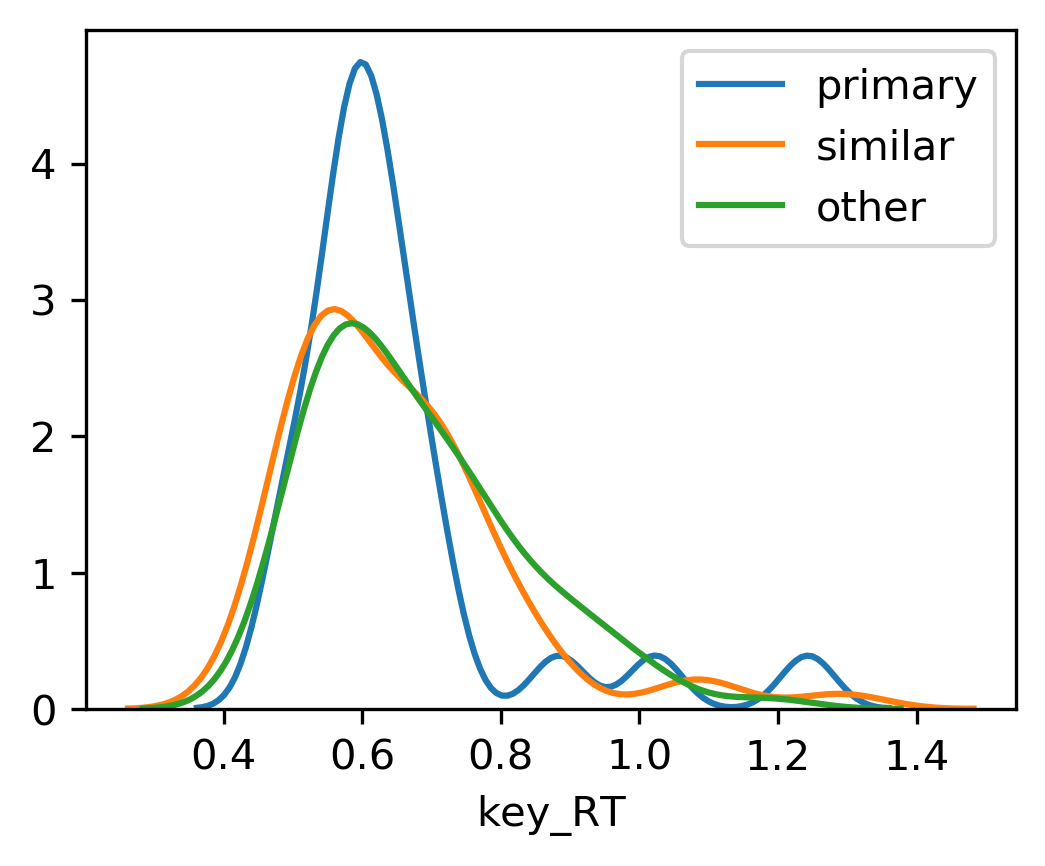

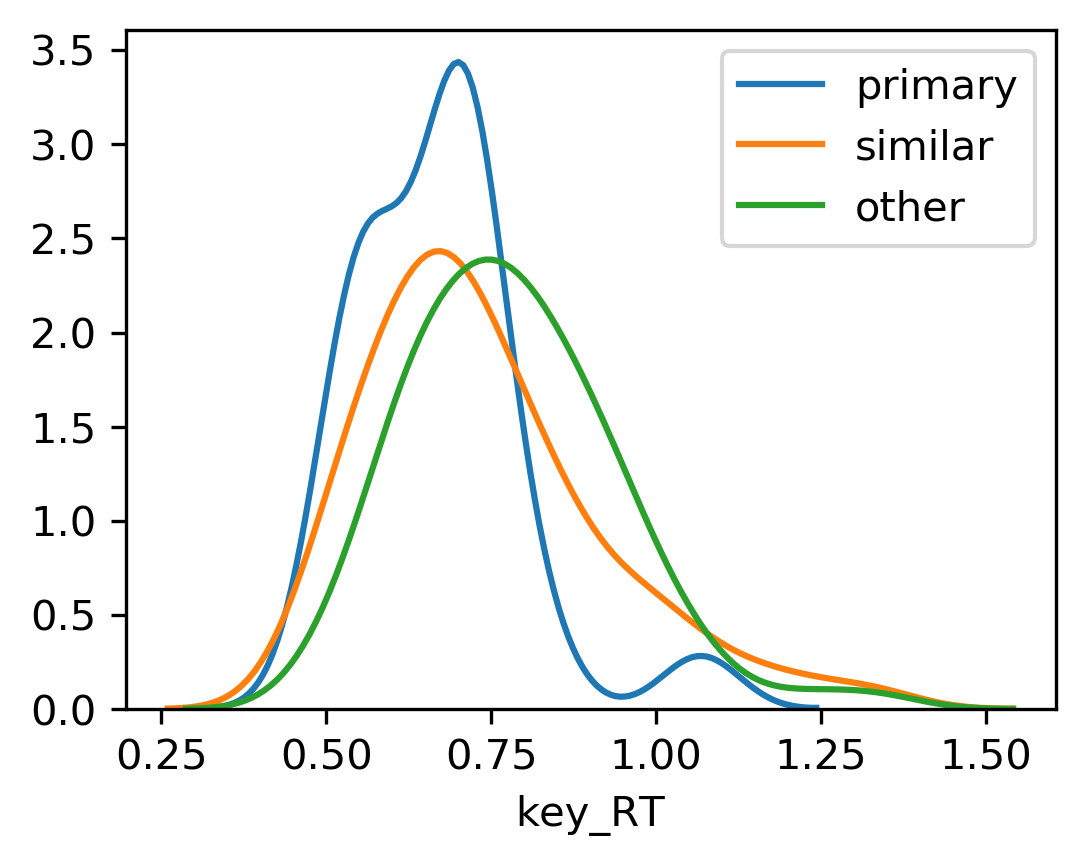

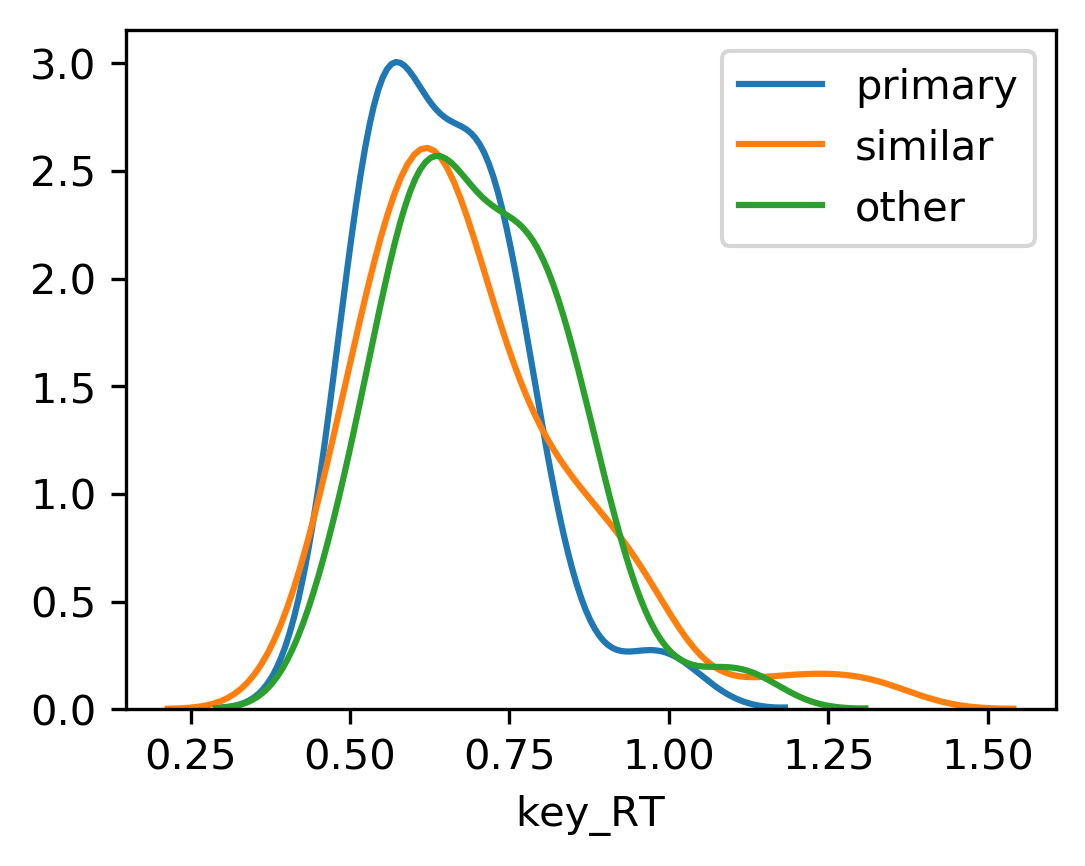

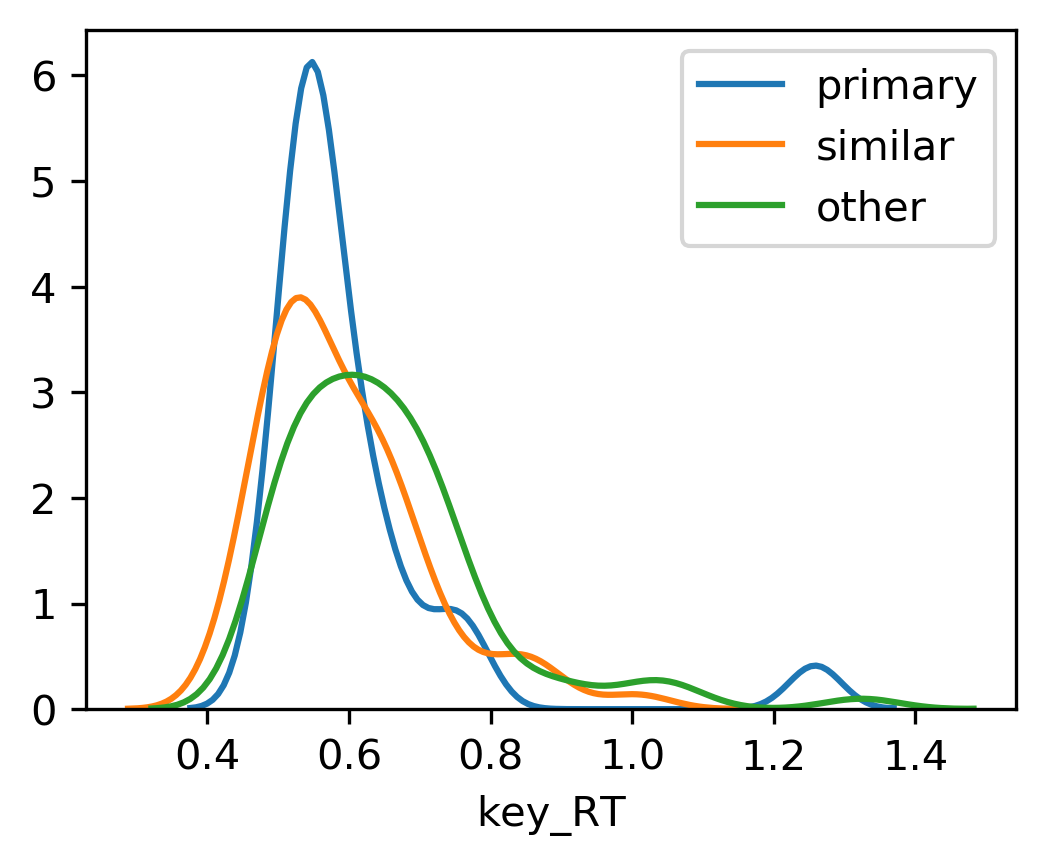

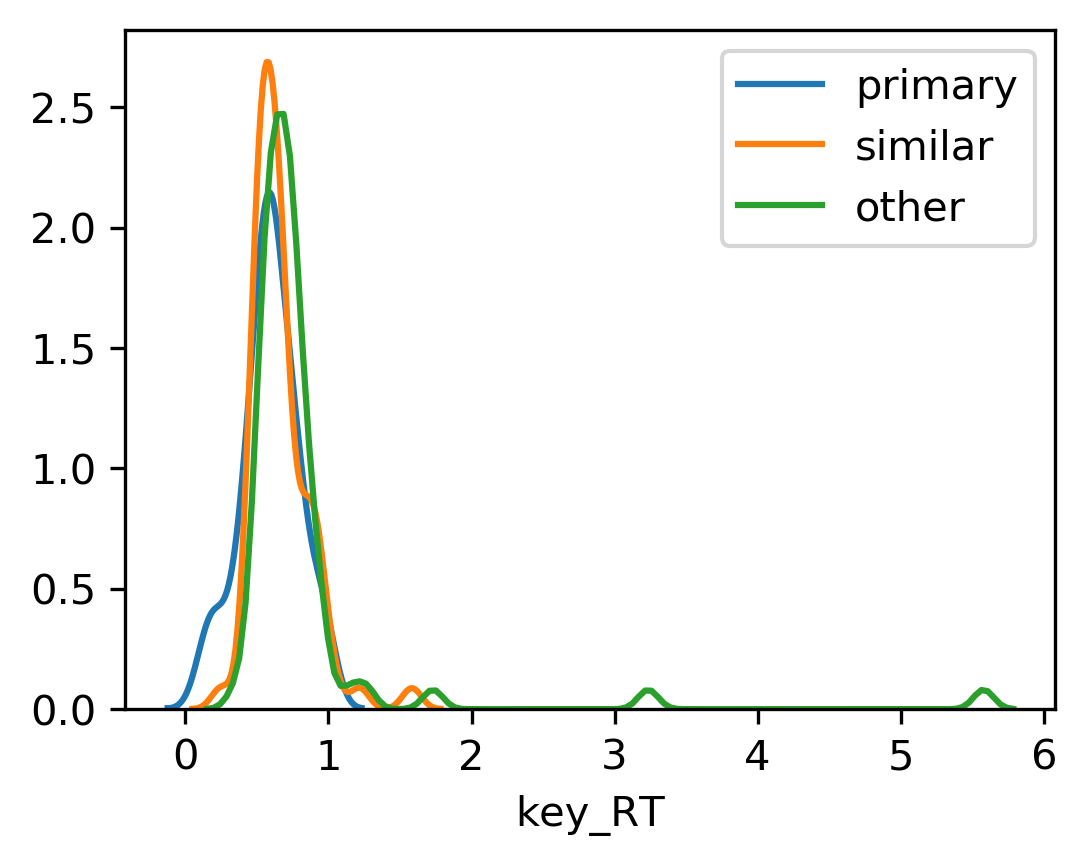

(15, 4)


In [29]:
# The variable data creates an empty dataframe with column names ready.
# The variable df imports the dataframe and sets the data to the new data variable.
data = {'targ_cond':[],'key_RT_mean':[], 'side_accuracy':[], 'color_accuracy':[]}
df = pandas.DataFrame(data = data)

# This runs SubjectStats for all files in this folder (5 participants).
for i in range(1, 6):
    # This tells the program what the name of each file will look like so that it can find the variables.
    key_RT_mean, side_accuracy, color_accuracy = SubjectStats('S_' + f"{i:02d}" + '.csv')
    # The variable data now fills in the columns with this information.
    data = {'targ_cond':['primary', 'similar', 'other'], 'key_RT_mean':key_RT_mean, 'side_accuracy':side_accuracy, 'color_accuracy':color_accuracy}
    # The variable df1 creates a new dataframe using the current data variable and then appends it to the current dataframe (df).
    df1 = pandas.DataFrame(data = data)
    df = df.append(df1)

# This reveals the number of rows and columns in the dataframe.
print(df.shape)
# This saves our dataframe to a csv file.
df.to_csv('GroupData.csv')


<h3> GROUP-LEVEL ANALYSES </h3>

In [30]:
# The variable df creates a dataframe from reading the csv file.
df = pandas.read_csv('GroupData.csv')
# This prints the last 5 lines of the dataframe.
print(df.tail())

    Unnamed: 0 targ_cond  key_RT_mean  side_accuracy  color_accuracy
10           1   similar     0.594158       0.907692        1.000000
11           2     other     0.652833       0.767442        0.906977
12           0   primary     0.593045       0.842105        1.000000
13           1   similar     0.663284       0.888889        0.972222
14           2     other     0.815886       1.000000        1.000000


In [31]:
# The variable prim is the primary target condition. The variable sim is the similar target condition. These both
# compare the key_RT_mean for these conditions.
prim = df.loc[df.loc[:, 'targ_cond'] == 'primary', 'key_RT_mean']
sim = df.loc[df.loc[:, 'targ_cond'] == 'similar', 'key_RT_mean']

# The variable dif calculates the difference score between the variables prim and sim for each participant.
dif = prim.to_numpy() - sim.to_numpy()
# This prints the difference score for each participant.
print(dif)

# The variable t outputs the t-statistic for the one-sample t-test. The variable p outputs the p-value for the 
# one-sample t-test. The t-test compares the variable dif to zero.
t, p = stats.ttest_1samp(dif, 0)
# This prints the t-statistic.
print(t)
# This prints the p-value. 
print(p)

[-0.00097696 -0.07226103 -0.05090634  0.01214102 -0.07023915]
-2.0614182092379587
0.10827825136325593


In [32]:
# The variable prim is the primary target condition. The variable other is the other target condition. These both
# compare the key_RT_mean for these conditions.
prim = df.loc[df.loc[:, 'targ_cond'] == 'primary', 'key_RT_mean']
other = df.loc[df.loc[:, 'targ_cond'] == 'other', 'key_RT_mean']

# The variable dif calculates the difference score between the variables prim and other for each participant.
dif = prim.to_numpy() - other.to_numpy()
# This prints the difference score for each participant.
print(dif)

# The variable t outputs the t-statistic for the one-sample t-test. The variable p outputs the p-value for the 
# one-sample t-test. The t-test compares the variable dif to zero.
t, p = stats.ttest_1samp(dif, 0)
# This prints the t-statistic.
print(t)
# This prints the p-value. 
print(p)

[-0.02629324 -0.11228716 -0.05816618 -0.04653394 -0.22284154]
-2.634001805520267
0.05794288726362593


In [33]:
# The variable sim is the similar target condition. The variable other is the other target condition. These both
# compare the key_RT_mean for these conditions.
sim = df.loc[df.loc[:, 'targ_cond'] == 'similar', 'key_RT_mean']
other = df.loc[df.loc[:, 'targ_cond'] == 'other', 'key_RT_mean']

# The variable dif calculates the difference score between the variables sim and other for each participant.
dif = sim.to_numpy() - other.to_numpy()
# This prints the difference score for each participant.
print(dif)

# The variable t outputs the t-statistic for the one-sample t-test. The variable p outputs the p-value for the 
# one-sample t-test. The t-test compares the variable dif to zero.
t, p = stats.ttest_1samp(dif, 0)
# This prints the t-statistic.
print(t)
# This prints the p-value. 
print(p)

[-0.02531628 -0.04002613 -0.00725983 -0.05867495 -0.1526024 ]
-2.2348197838672537
0.08913271651150098


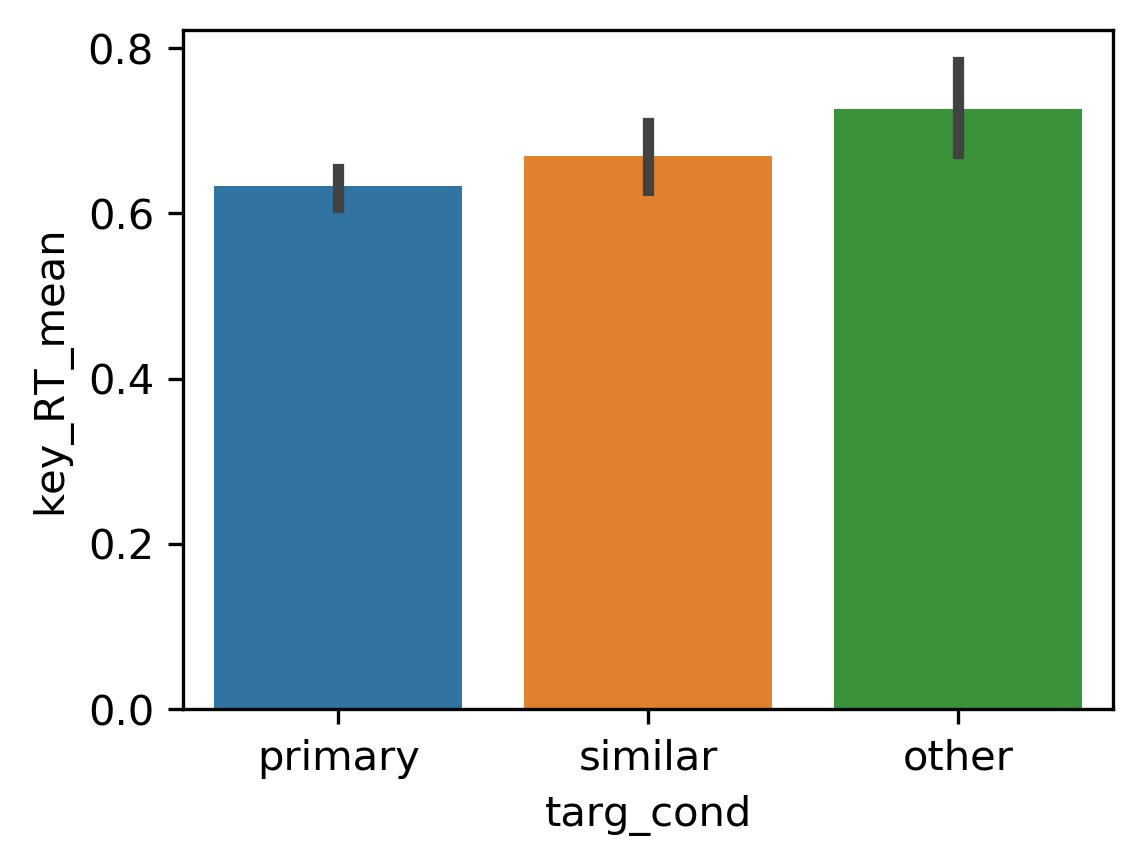

In [34]:
# This sets the figure size in inches and the resolution/dpi in pixels per inch.
plt.figure(figsize = (4, 3), dpi = 300)
# This creates the figure for key_RT_mean by targ_cond, using the data in df.
sns.barplot(data = df, x = 'targ_cond', y = 'key_RT_mean')
# This draws the figure. 
plt.show()

In [35]:
# The variable prim is the primary target condition. The variable sim is the similar target condition. These both
# compare the side_accuracy for these conditions.
prim = df.loc[df.loc[:, 'targ_cond'] == 'primary', 'side_accuracy']
sim = df.loc[df.loc[:, 'targ_cond'] == 'similar', 'side_accuracy']

# The variable dif calculates the difference score between the variables prim and sim for each participant.
dif = prim.to_numpy() - sim.to_numpy()
# This prints the difference score for each participant.
print(dif)

# The variable t outputs the t-statistic for the one-sample t-test. The variable p outputs the p-value for the 
# one-sample t-test. The t-test compares the variable dif to zero.
t, p = stats.ttest_1samp(dif, 0)
# This prints the t-statistic.
print(t)
# This prints the p-value. 
print(p)

[ 0.05069124  0.07625     0.01647059 -0.11458886 -0.04678363]
-0.10389141463044584
0.9222561540868769


In [36]:
# The variable prim is the primary target condition. The variable other is the other target condition. These both
# compare the side_accuracy for these conditions.
prim = df.loc[df.loc[:, 'targ_cond'] == 'primary', 'side_accuracy']
other = df.loc[df.loc[:, 'targ_cond'] == 'other', 'side_accuracy']

# The variable dif calculates the difference score between the variables prim and other for each participant.
dif = prim.to_numpy() - other.to_numpy()
# This prints the difference score for each participant.
print(dif)

# The variable t outputs the t-statistic for the one-sample t-test. The variable p outputs the p-value for the 
# one-sample t-test. The t-test compares the variable dif to zero.
t, p = stats.ttest_1samp(dif, 0)
# This prints the t-statistic.
print(t)
# This prints the p-value. 
print(p)

[ 0.01269841  0.05186813  0.02390805  0.02566159 -0.15789474]
-0.23131377516962073
0.8284217484290521


In [37]:
# The variable sim is the similar target condition. The variable other is the other target condition. These both
# compare the side_accuracy for these conditions.
sim = df.loc[df.loc[:, 'targ_cond'] == 'similar', 'side_accuracy']
other = df.loc[df.loc[:, 'targ_cond'] == 'other', 'side_accuracy']

# The variable dif calculates the difference score between the variables sim and other for each participant.
dif = sim.to_numpy() - other.to_numpy()
# This prints the difference score for each participant.
print(dif)

# The variable t outputs the t-statistic for the one-sample t-test. The variable p outputs the p-value for the 
# one-sample t-test. The t-test compares the variable dif to zero.
t, p = stats.ttest_1samp(dif, 0)
# This prints the t-statistic.
print(t)
# This prints the p-value. 
print(p)

[-0.03799283 -0.02438187  0.00743746  0.14025045 -0.11111111]
-0.12518240099632325
0.9064184573428606


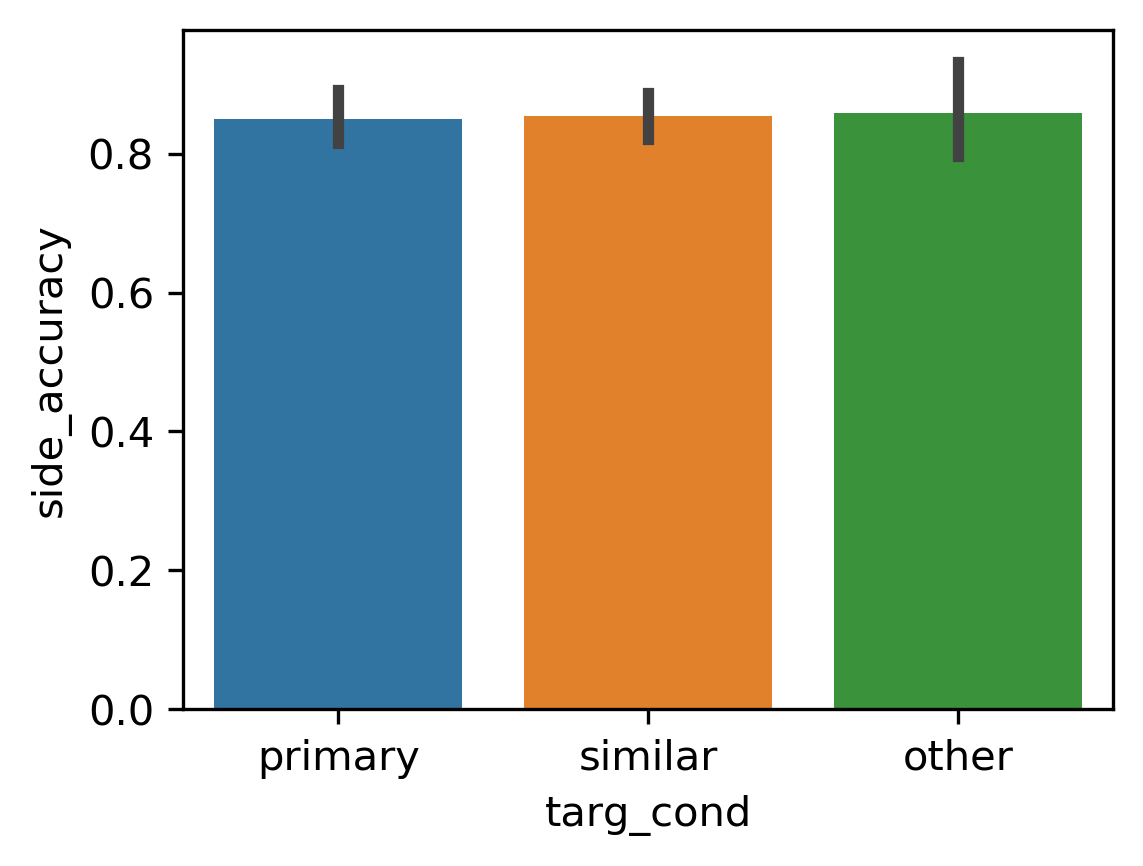

In [38]:
# This sets the figure size in inches and the resolution/dpi in pixels per inch.
plt.figure(figsize = (4, 3), dpi = 300)
# This creates the figure for side_accuracy by targ_cond, using the data in df.
sns.barplot(data = df, x = 'targ_cond', y = 'side_accuracy')
# This draws the figure. 
plt.show()

In [39]:
# The variable prim is the primary target condition. The variable sim is the similar target condition. These both
# compare the color_accuracy for these conditions.
prim = df.loc[df.loc[:, 'targ_cond'] == 'primary', 'color_accuracy']
sim = df.loc[df.loc[:, 'targ_cond'] == 'similar', 'color_accuracy']

# The variable dif calculates the difference score between the variables prim and sim for each participant.
dif = prim.to_numpy() - sim.to_numpy()
# This prints the difference score for each participant.
print(dif)

# The variable t outputs the t-statistic for the one-sample t-test. The variable p outputs the p-value for the 
# one-sample t-test. The t-test compares the variable dif to zero.
t, p = stats.ttest_1samp(dif, 0)
# This prints the t-statistic.
print(t)
# This prints the p-value. 
print(p)

[0.         0.03125    0.02941176 0.         0.02777778]
2.442432751067123
0.07102190660065423


In [40]:
# The variable prim is the primary target condition. The variable other is the other target condition. These both
# compare the color_accuracy for these conditions.
prim = df.loc[df.loc[:, 'targ_cond'] == 'primary', 'color_accuracy']
other = df.loc[df.loc[:, 'targ_cond'] == 'other', 'color_accuracy']

# The variable dif calculates the difference score between the variables prim and other for each participant.
dif = prim.to_numpy() - other.to_numpy()
# This prints the difference score for each participant.
print(dif)

# The variable t outputs the t-statistic for the one-sample t-test. The variable p outputs the p-value for the 
# one-sample t-test. The t-test compares the variable dif to zero.
t, p = stats.ttest_1samp(dif, 0)
# This prints the t-statistic.
print(t)
# This prints the p-value. 
print(p)

[0.         0.06593407 0.02298851 0.09302326 0.        ]
1.9579578161156963
0.12183964236524122


In [41]:
# The variable sim is the similar target condition. The variable other is the other target condition. These both
# compare the color_accuracy for these conditions.
sim = df.loc[df.loc[:, 'targ_cond'] == 'similar', 'color_accuracy']
other = df.loc[df.loc[:, 'targ_cond'] == 'other', 'color_accuracy']

# The variable dif calculates the difference score between the variables sim and other for each participant.
dif = sim.to_numpy() - other.to_numpy()
# This prints the difference score for each participant.
print(dif)

# The variable t outputs the t-statistic for the one-sample t-test. The variable p outputs the p-value for the 
# one-sample t-test. The t-test compares the variable dif to zero.
t, p = stats.ttest_1samp(dif, 0)
# This prints the t-statistic.
print(t)
# This prints the p-value. 
print(p)

[ 0.          0.03468407 -0.00642326  0.09302326 -0.02777778]
0.8855059286019943
0.42590753915174634


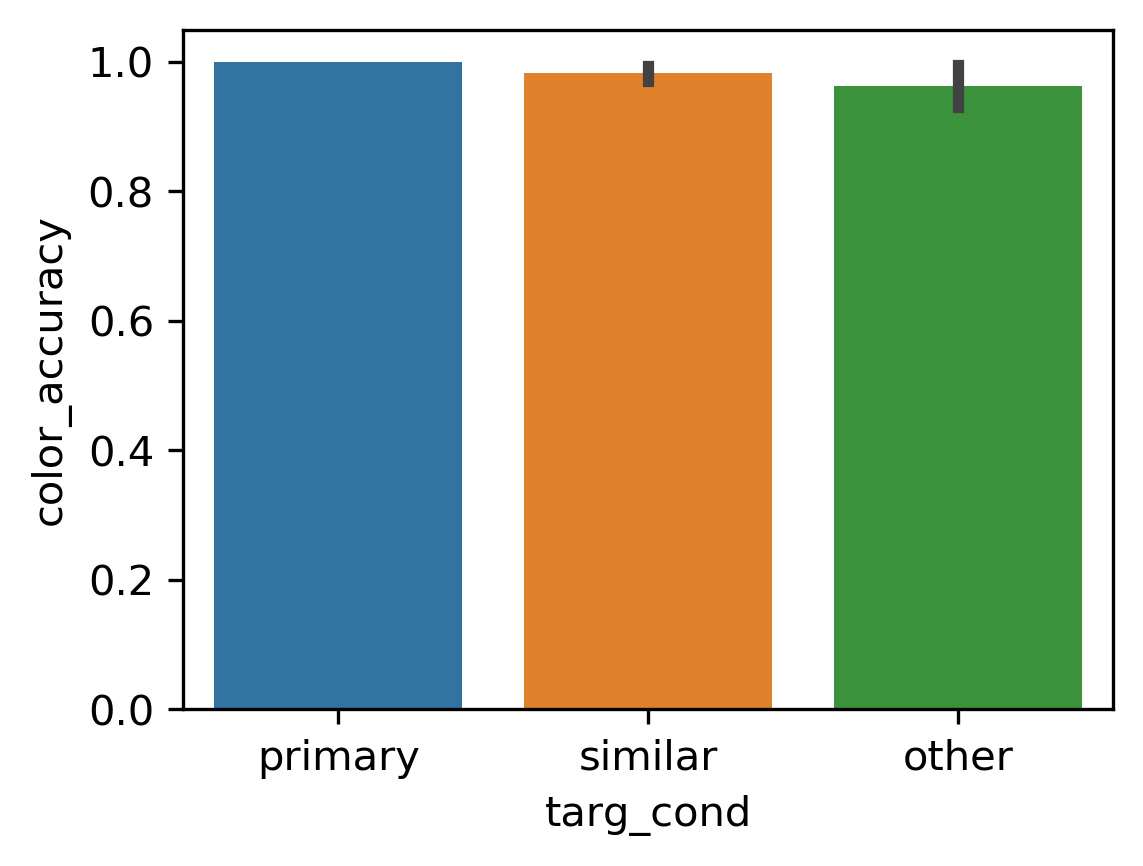

In [42]:
# This sets the figure size in inches and the resolution/dpi in pixels per inch.
plt.figure(figsize = (4, 3), dpi = 300)
# This creates the figure for color_accuracy by targ_cond, using the data in df.
sns.barplot(data = df, x = 'targ_cond', y = 'color_accuracy')
# This draws the figure. 
plt.show()